In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import copy

In [2]:
try:
    terror = pd.read_csv('E:\\terrorist.csv')
except:
    print("file not found...")

In [3]:
terror.head(5)

,iyear,imonth,iday,country_txt,city,attacktype1_txt,targtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nwound,propextent_txt,ransomamt
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN
1,2012,1,1,Pakistan,Sui,Bombing/Explosion,Military,Frontier Corps (FC),Soldiers,Pakistan,Baloch Republican Army (BRA),Explosives/Bombs/Dynamite,Land Mine,NaN,4.0,3.0,Minor (likely < $1 million),NaN
2,2012,1,1,Kenya,Garissa,Armed Assault,Business,Unknown,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,NaN,2.0,14.0,Minor (likely < $1 million),NaN
3,2012,1,1,Afghanistan,Karez,Bombing/Explosion,Military,North Atlantic Treaty Organization (NATO): Int...,Vehicle,International,Taliban,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,0.0,0.0,Unknown,NaN
4,2012,1,1,Democratic Republic of the Congo,Shabunda,Facility/Infrastructure Attack,Private Citizens & Property,Not Applicable,Civilians,Democratic Republic of the Congo,Democratic Front for the Liberation of Rwanda ...,Incendiary,Arson/Fire,NaN,18.0,5.0,Minor (likely < $1 million),NaN


In [4]:
terror.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attack',\
             'targtype1_txt':'target', 'corp1':'target_inst', 'target1':'target_pop', 'natlty1_txt':'nationality',\
             'gname':'group','weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype', 'nkill':'kill', \
             'nwound':'wound','propextent_txt':'property_damg', 'ransomamt':'ransom'},axis='columns',inplace=True)

In [5]:
terror['casualties']=terror['kill']+terror['wound']

In [6]:
terror.head(1)

,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN,17.0


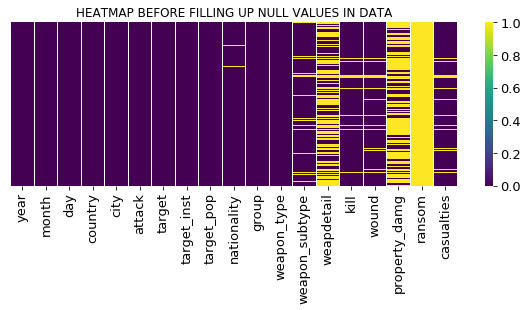

In [7]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP BEFORE FILLING UP NULL VALUES IN DATA')
sns.heatmap(terror.isnull(),yticklabels=False,cbar=True,cmap='viridis')

* MOST OF THE RANSOM AMOUNTS,PROPERTY-DAMAGE EXTENTS,WEAPON DETAILS NOT PROVIDED IN DATASET
* MOST TERRORITS WERE INTERESTED IN MASS KILLING,PROPERTY DAMAGE OR SIMPLY ATTACKING THAN PROCURING MONEY TO RELEASE HOSTAGE!
* NOT MUCH PROPERTY DAMAGE OBSERVED

In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43915 entries, 0 to 43914
Data columns (total 19 columns):
year              43915 non-null int64
month             43915 non-null int64
day               43915 non-null int64
country           43915 non-null object
city              43915 non-null object
attack            43915 non-null object
target            43915 non-null object
target_inst       43915 non-null object
target_pop        43915 non-null object
nationality       43342 non-null object
group             43915 non-null object
weapon_type       43915 non-null object
weapon_subtype    39346 non-null object
weapdetail        16985 non-null object
kill              41290 non-null float64
wound             39313 non-null float64
property_damg     15615 non-null object
ransom            273 non-null float64
casualties        39141 non-null float64
dtypes: float64(4), int64(3), object(12)
memory usage: 6.4+ MB


In [9]:
terror.describe()

,year,month,day,kill,wound,ransom,casualties
count,43915.000000,43915.000000,43915.000000,41290.000000,39313.000000,2.730000e+02,39141.000000
mean,2014.688079,6.442537,15.664716,3.110463,3.504006,4.066460e+06,5.946118
std,1.229350,3.390650,8.778536,13.343306,13.988988,2.180638e+07,18.759789
min,2012.000000,1.000000,1.000000,0.000000,0.000000,-9.900000e+01,0.000000
25%,2014.000000,4.000000,8.000000,0.000000,0.000000,-9.900000e+01,0.000000
50%,2015.000000,6.000000,15.000000,1.000000,0.000000,1.586045e+04,2.000000
75%,2016.000000,9.000000,23.000000,2.000000,3.000000,2.189562e+05,6.000000
max,2016.000000,12.000000,31.000000,1500.000000,1500.000000,2.000000e+08,1503.000000


* MAXIMUM PEOPLE EVER KILLED IN AN EVENT IS 1500!
* MAXIMUM PEOPLE EVER WOUNDED IN AN EVENT IS 1500!
* 50% OF ATTACKS EITHER KILLED 1 PERSON OR NO-ONE
* 50% OF ATTACKS WOUNDED NO-ONE!
* MAXIMUM RANSOM AMOUNT ASKED EVER WAS 20 CRORES!
* AVERAGE CASUALTIES PER ATTACK IS 6
* MAXIMUM CASUALTIES EVRE IS 1503. 

In [10]:
terror[terror.ransom==200000000]

,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
12769,2014,8,14,Syria,Marea,Hostage Taking (Kidnapping),Private Citizens & Property,Not Applicable,Civilian: Haruna Yukawa,Japan,Islamic State of Iraq and the Levant (ISIL),Firearms,Unknown Gun Type,NaN,1.0,0.0,NaN,200000000.0,1.0
14383,2014,10,25,Syria,Unknown,Hostage Taking (Kidnapping),Journalists & Media,Not Applicable,Freelance Video Journalist: Kenji Goto,Japan,Islamic State of Iraq and the Levant (ISIL),Unknown,NaN,NaN,1.0,0.0,NaN,200000000.0,1.0


* ABOVE ATTACKS ASKED FOR 20 CRORES AS RANSOM AMOUNT!

In [11]:
terror.corr() #strong relation b/w casualties and 1.wound,2.kill.. wound and casualties

,year,month,day,kill,wound,ransom,casualties
year,1.000000,-0.032845,-0.002996,-0.019340,-0.025865,-0.165084,-0.027597
month,-0.032845,1.000000,0.002112,0.005468,-0.001070,0.077339,0.003335
day,-0.002996,0.002112,1.000000,-0.008516,-0.001725,0.041875,-0.001706
kill,-0.019340,0.005468,-0.008516,1.000000,0.364357,0.029284,0.718234
wound,-0.025865,-0.001070,-0.001725,0.364357,1.000000,-0.038720,0.909665
ransom,-0.165084,0.077339,0.041875,0.029284,-0.038720,1.000000,0.019981
casualties,-0.027597,0.003335,-0.001706,0.718234,0.909665,0.019981,1.000000


* NOT MUCH CORRELATION BETWEEN ANY VALUES EXCEPT BETWEEN CASUALITIES WITH KILLS AND WOUNDED

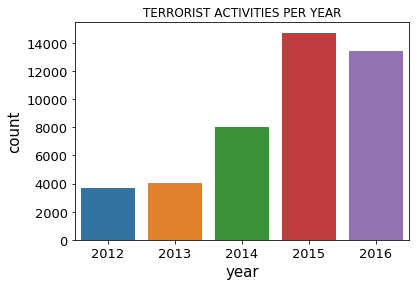

In [12]:
plt.title('TERRORIST ACTIVITIES PER YEAR')
plt.rcParams['axes.labelsize']=12
sns.countplot(x=terror.year)

* GLOBAL TERRORIST ACTIVITIES HAVE BBEN INCREASING SINCE 2012 UNTIL IT DECREASED IN 2016!

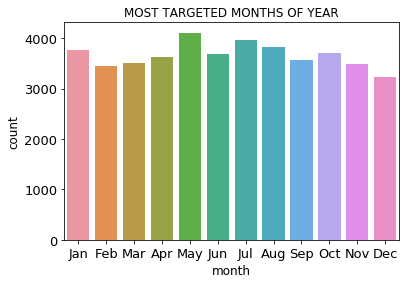

In [13]:
plt.title('MOST TARGETED MONTHS OF YEAR')
plt.rcParams['axes.labelsize']=15
clo=copy.deepcopy(terror)
clo['month']=clo['month'].apply(lambda x:calendar.month_abbr[x])
sns.countplot(x=clo.month)

* ATTACKS HAVE BEEN LEAST IN DECEMBER, MAXIMUM IN MAY.
* TERRORISTS FOUND MAY,JULY,JANUARY,AUGUST MOST PREFERABLE
* MOST ATTACKS CONCENTRATED IN THE MID OF THE YEAR

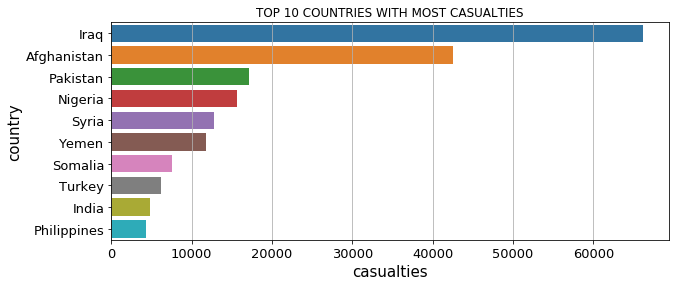

In [14]:
a,c=[],[]
for g,d in terror.groupby('country'):
        a.append(g)
        c.append(d.casualties.sum())
plt.figure(figsize=(10,4))
plt.grid(True)
plt.title('TOP 10 COUNTRIES WITH MOST CASUALTIES')
gc=pd.DataFrame(dict(casualties=c,country=a),columns=['casualties','country']).sort_values(ascending=False,by='casualties')[0:10]
sns.barplot(data=gc,y='country',x='casualties',ci=None)       

* MOSTLY SOUTH-WEST ASIAN,SOUTH-ASIAN COUNTRIES AFFECTED, TWO IN AFRICA AFFECTED TOO

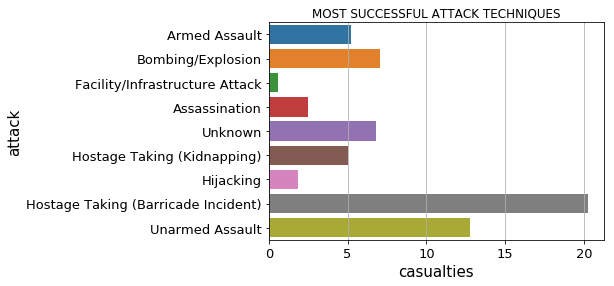

In [15]:
plt.title('MOST SUCCESSFUL ATTACK TECHNIQUES')
plt.grid(True)
sns.barplot(data=terror,y='attack',x='casualties',ci=None)

* HOSTAGE-TAKING IN BARRICADE INCIDENTS CAUSED MAJOR CASUALTIES, MEANING EITHER THE MANY CRIMINAL'S CONDITIONS WERE NOT FULFILLED ON TIME SO HE ATTACKED MANY OR WHILE HIS CAPTURE MANY WERE AFFECTED 
* UNARMED ASSAULTS AND BOMBIMG/EXPLOSION TOO AFFECTED MANY

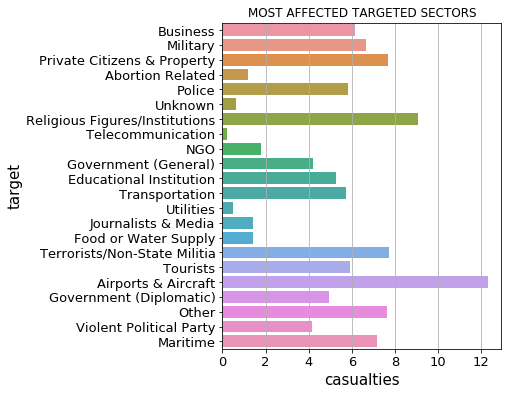

In [16]:
plt.figure(figsize=(5,6))
plt.title('MOST AFFECTED TARGETED SECTORS')
plt.grid(True)
sns.barplot(data=terror,y='target',x='casualties',ci=None)

* NOT MANY PEOPLE COULD SAVE THEMSELVES IN AIRCRAFTS/AIRPORTS,RELIGIOUS PLACES OR TERRORIST/NON-STATE MILITIA 

NUMBER OF TERRORIST GROUPS:  736


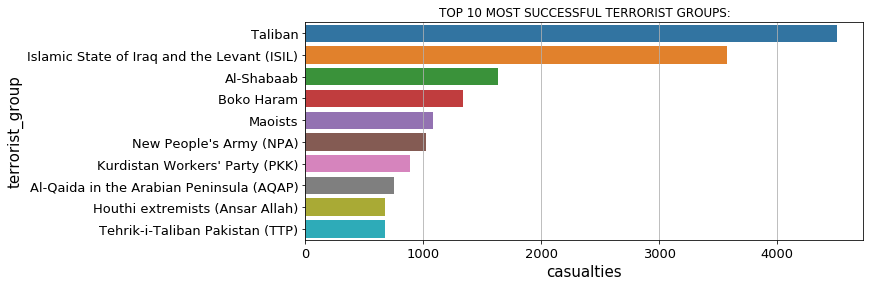

In [17]:
a,c=[],[]
for g,d in terror.groupby('group'):
    if(d.casualties.count()>0):
        a.append(g)
        c.append(d.casualties.count())
plt.figure(figsize=(10,4))
print('NUMBER OF TERRORIST GROUPS: ',len(a))
plt.title('TOP 10 MOST SUCCESSFUL TERRORIST GROUPS:')
plt.grid(True)
gc=pd.DataFrame(dict(casualties=c,terrorist_group=a),columns=['casualties','terrorist_group']).sort_values(ascending=False,by='casualties')[1:11]
sns.barplot(data=gc,y='terrorist_group',x='casualties',ci=None)

* MOST SUCCESSFUL TERRORIST GROUPS - TALIBAN, ISIL

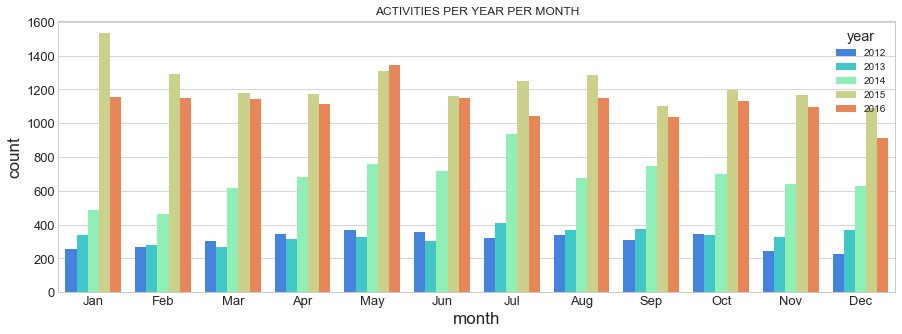

In [18]:
plt.figure(figsize=(15,5))
plt.rcParams['axes.labelsize']=17
sns.set_style('whitegrid')
plt.title('ACTIVITIES PER YEAR PER MONTH')
clo=copy.deepcopy(terror)
clo['month']=clo['month'].apply(lambda x:calendar.month_abbr[x])
sns.countplot(x='month',hue='year',data=clo,palette='rainbow')

* IN JANUARY 2015, AROUND 1500 ATTCKS WERE MADE!

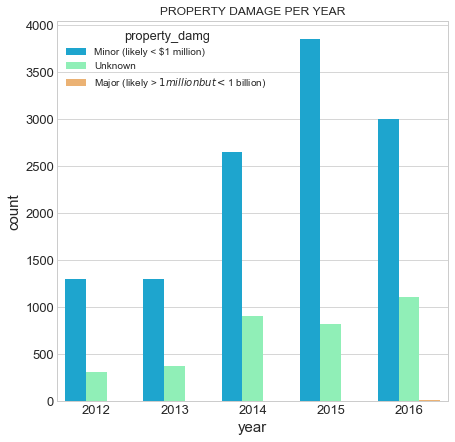

In [19]:
plt.figure(figsize=(7,7))
plt.rcParams['axes.labelsize']=15
sns.set_style('whitegrid')
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=terror,palette='rainbow')

* NEGLIGIBLE PROPERTY DAMAGE GREATER THAN 1 MILLION DOLLAR HAS OCCURED
* 2015 SAW A HUGE PROPERT LOSS CLOSE TO 3700 MILLION DOLLARS!

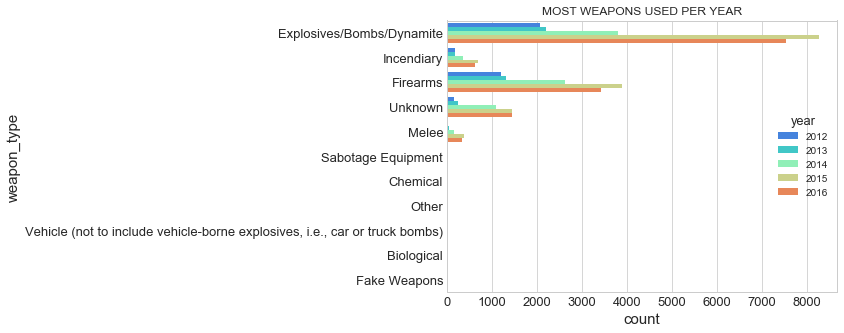

In [20]:
plt.figure(figsize=(7,5))
plt.rcParams['axes.labelsize']=15
sns.set_style('whitegrid')
plt.title('MOST WEAPONS USED PER YEAR')
sns.countplot(y='weapon_type',data=terror,hue='year',palette='rainbow')

* WEAPON USE IS INCREASING WITH EACH YEAR!

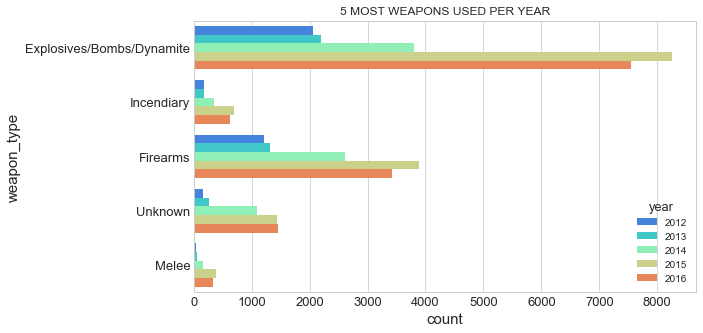

In [21]:
plt.figure(figsize=(9,5))
plt.title('5 MOST WEAPONS USED PER YEAR')
x=terror[(terror.weapon_type=='Explosives/Bombs/Dynamite')|(terror.weapon_type=='Incendiary')\
       |(terror.weapon_type=='Unknown')|(terror.weapon_type=='Melee')|(terror.weapon_type=='Firearms')]
sns.countplot(y='weapon_type',data=x,hue='year',palette='rainbow')

* IN 2016,2015,2014 EXPLOSIVES/BOMBS/DYNAMITES HAVE BEEN EXTENSIVELY USED!

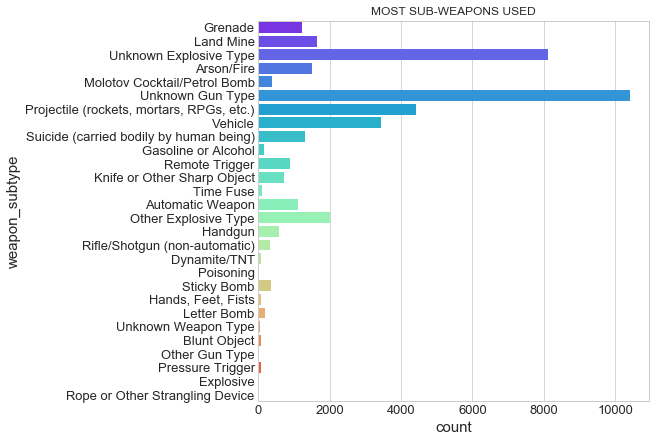

In [22]:
plt.figure(figsize=(7,7))
plt.rcParams['axes.labelsize']=15
sns.set_style('whitegrid')
plt.title('MOST SUB-WEAPONS USED')
sns.countplot(y='weapon_subtype',data=terror,palette='rainbow')

* UNKNOWN GUN TYPE,EXPLOSION TYPE WHICH HAVE NOT YET BEEN INSPECTED HAVE BEEN USED!
* PROJECTILES AND VEHICLES TOO HAVE BEEN USED

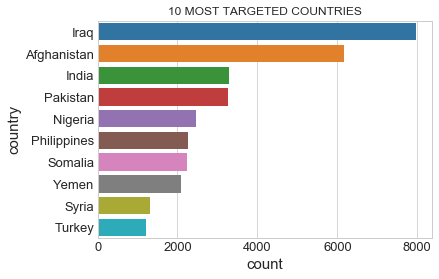

In [23]:
c,con=[],[]
plt.title('10 MOST TARGETED COUNTRIES')
for g,d in terror.groupby('country'):
    c.append(d.country.count())
    con.append(g)
cc=pd.DataFrame(dict(count=c,country=con),columns=['count','country']).sort_values(ascending=False,by='count')[0:10]
sns.barplot(data=cc,x='count',y='country',ci=None)

* MOST SOUTH-WEST ASIAN,SOUTH-ASIAN COUNTRIES TARGETED, TWO IN AFRICA AFFECTED TOO

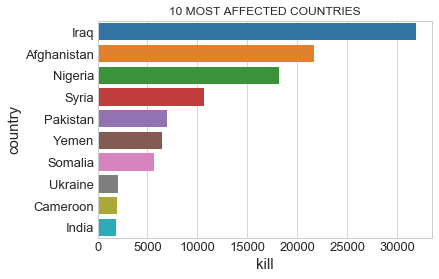

In [24]:
k,con=[],[]
plt.title('10 MOST AFFECTED COUNTRIES')
for g,d in terror.groupby('country'):
    k.append(d.kill.sum())
    con.append(g)
ck=pd.DataFrame(dict(kill=k,country=con),columns=['kill','country']).sort_values(by='kill',ascending=False)[0:10]
sns.barplot(data=ck,x='kill',y='country',ci=None)

* MAXIMUM DEATHS IN SOUTH-WEST ASIAN,SOUTH-ASIAN COUNTRIES, THREE IN AFRICA AFFECTED TOO,ONE IN EUROPE
* IRAQ SAW TOTAL OF MORE THAN 30000 DEATHS,AFGHANISTAN MORE THAN 20000! 
* INDIA IN 10TH PLACE SEEING MAXIMUM DEATHS!

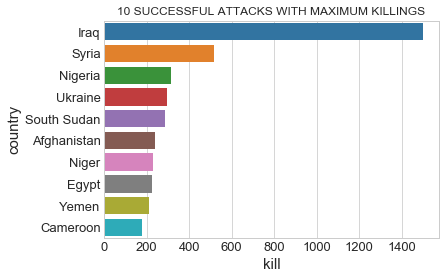

In [25]:
k,con=[],[]
plt.title('10 SUCCESSFUL ATTACKS WITH MAXIMUM KILLINGS')
for g,d in terror.groupby('country'):
    k.append(d.kill.max())
    con.append(g)
ck=pd.DataFrame(dict(kill=k,country=con),columns=['kill','country']).sort_values(by='kill',ascending=False)[0:10]
sns.barplot(data=ck,x='kill',y='country',ci=None)

* AN ATTACK IN IRAQ KILLED CLOSE TO 1500 PEOPLE!  

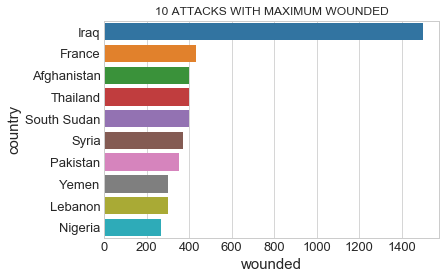

In [26]:
w,con=[],[]
plt.title('10 ATTACKS WITH MAXIMUM WOUNDED')
for g,d in terror.groupby('country'):
    w.append(d.wound.max())
    con.append(g)
ck=pd.DataFrame(dict(wounded=w,country=con),columns=['wounded','country']).sort_values(by='wounded',ascending=False)[0:10]
sns.barplot(data=ck,x='wounded',y='country',ci=None)

* IRAQ AGAIN TOPS THE LIST OF WOUNDED,LIKE IN DEATHS 

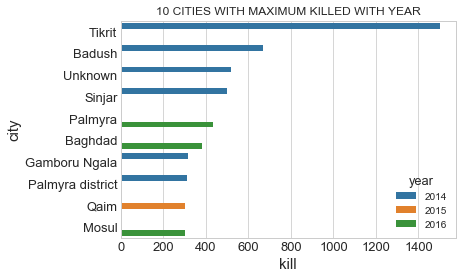

In [27]:
clo=pd.DataFrame(dict(kill=terror['kill'],city=terror['city'],year=terror['year']),columns=['kill','city','year'])
clo=clo.sort_values(by='kill',ascending=False)[0:10]
plt.title('10 CITIES WITH MAXIMUM KILLED WITH YEAR')
sns.barplot(data=clo,x='kill',y='city',hue='year',ci=None)

* MAJOR ATTACK-DEATHS OCCURED IN 2014 IN TIKRIT,BADUSH,UNKNOWN PLACES,SINJAR!

In [28]:
terror.isnull().sum()

year                  0
month                 0
day                   0
country               0
city                  0
attack                0
target                0
target_inst           0
target_pop            0
nationality         573
group                 0
weapon_type           0
weapon_subtype     4569
weapdetail        26930
kill               2625
wound              4602
property_damg     28300
ransom            43642
casualties         4774
dtype: int64

In [29]:
terror.fillna('Unknown', inplace=True)

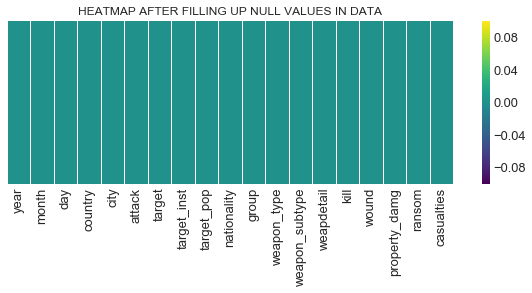

In [30]:
plt.figure(figsize=(10,3)) 
plt.title('HEATMAP AFTER FILLING UP NULL VALUES IN DATA') 
sns.heatmap(terror.isnull(),yticklabels=False,cbar=True,cmap='viridis')

* ALL NULL VALUES FILLED